In [8]:
import pandas as pd

def prob_zero_error(μ: 'true probability of error',
                    M: 'number of hypotheses',
                    N: 'number of data points'):
    return 1 - (1 - (1 - μ)**N)**M

d = [{'μ': μ, 
      'M': M, 
      'p': prob_zero_error(μ, M, N=16)} 
     for μ in [0.05, 0.5, 0.8] 
     for M in [1, 1_000, 10*1_000_000]]

# print(pd.DataFrame(d).pivot('M', 'μ', 'p').to_html())
pd.DataFrame(d).pivot('M', 'μ', 'p')

μ,0.05,0.5,0.8
M,,,
1,0.440127,0.000015,6.553647e-12
1000,1.000000,0.015143,6.553647e-09
10000000,1.000000,1.000000,6.553432e-05


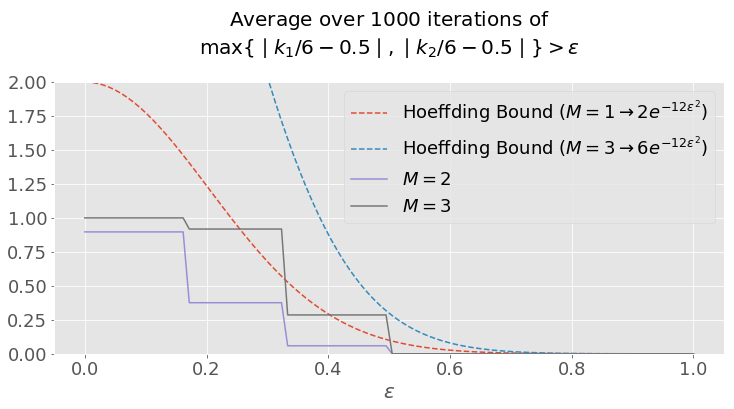

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

N = 6
M = 2
μ = 0.5

def hoeffding_bound(ϵ, N, M=1):
    return 2*M*np.exp(-2*N*ϵ**2)

def P(N, M, ϵ_space, μ):
    k = np.random.binomial(n=N,
                           p=μ,
                           size=(1_000, M))
    P = np.abs(k/N - μ).max(axis=1)
    return [(P > ϵ).mean() for ϵ in ϵ_space]

ϵ_space = np.linspace(0, 1, 100)
plt.figure(figsize=(12,5))
plt.plot(ϵ_space, hoeffding_bound(ϵ_space, N), '--',
         ϵ_space, hoeffding_bound(ϵ_space, N, M=3), '--', 
         ϵ_space, P(6, 2, ϵ_space, μ),
         ϵ_space, P(6, 10, ϵ_space, μ));
plt.title('Average over $1000$ iterations of\n'
          '$\max \{ \mid k_1/6 - 0.5 \mid,'
          '\mid k_2/6 - 0.5 \mid\} > \epsilon $\n',
          fontsize=20)
plt.legend(['Hoeffding Bound '
            '($M=1 \\rightarrow 2e^{-12\epsilon^2}$)',
            'Hoeffding Bound '
            '($M=3 \\rightarrow 6e^{-12\epsilon^2}$)',
            '$M=2$',
            '$M=3$'], fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.ylim(0, 2)
plt.xlabel('$\epsilon$', fontsize=20);